# Mid-Term Project 1 : Facies Classification Dataset

### Name 1 : Manan Shah (UIN: 631009930)
### Name 2: Sidharth Thazhathedathu (UIN: 427009745)

### Overall Steps in Project
1. Importing Datasets 
2. Checking for Missing Values
3. Outlier Detection and Removing them
4. Feature Engineering
5. Model Building
6. Checking for accuracy and evaluating Models
7. Predicted Data Visualisation
8. Deployment on Unseen Well 13 Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

### Importing Data

In [10]:
data_14=pd.read_excel("VolveData_Project.xlsx",sheet_name = "well 14")
data_15=pd.read_excel("VolveData_Project.xlsx",sheet_name = "well 15")

In [11]:
data = pd.concat([data_14, data_15],axis=0)
print(data_14.shape)
print(data_15.shape)
print(data.shape)

(2082, 7)
(1159, 7)
(3241, 7)


In [12]:
data = data.reset_index() #Resetting the Index after combining two dataframes


In [55]:
data.head()
data.tail()

,index,Depth,Well,GR,RT,RHOB,NPHI,Facies
3236,1154,4083.5,15,59.706,1.759,2.4851,0.1416,CB
3237,1155,4084.0,15,58.417,1.651,2.4860,0.1416,CB
3238,1156,4084.5,15,57.499,1.597,2.5311,0.1527,CB
3239,1157,4085.0,15,56.785,1.482,2.4731,0.1785,CB
3240,1158,4085.5,15,61.722,1.435,2.4920,0.1566,CB


### Data Exploration

In [14]:
data.describe() #Initial read shows that outliers in GR, RT and NPHI

,index,Depth,Well,GR,RT,RHOB,NPHI
count,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000
mean,875.464980,3733.609380,14.357606,51.379917,4.292569,2.432688,0.207456
std,566.662757,265.253354,0.479369,57.700965,14.524740,0.147662,0.104241
min,0.000000,3178.500000,14.000000,3.655000,0.094000,1.805100,0.013500
25%,405.000000,3542.000000,14.000000,17.433000,1.014000,2.311000,0.133600
50%,810.000000,3747.500000,14.000000,34.083600,1.864900,2.459000,0.187900
75%,1271.000000,3950.500000,15.000000,71.846000,3.697700,2.550000,0.267500
max,2081.000000,4220.500000,15.000000,1567.590000,461.170000,3.149300,0.853200


In [15]:
data.isna().any() #Shows that there are no Missing Values

index     False
Depth     False
Well      False
GR        False
RT        False
RHOB      False
NPHI      False
Facies    False
dtype: bool

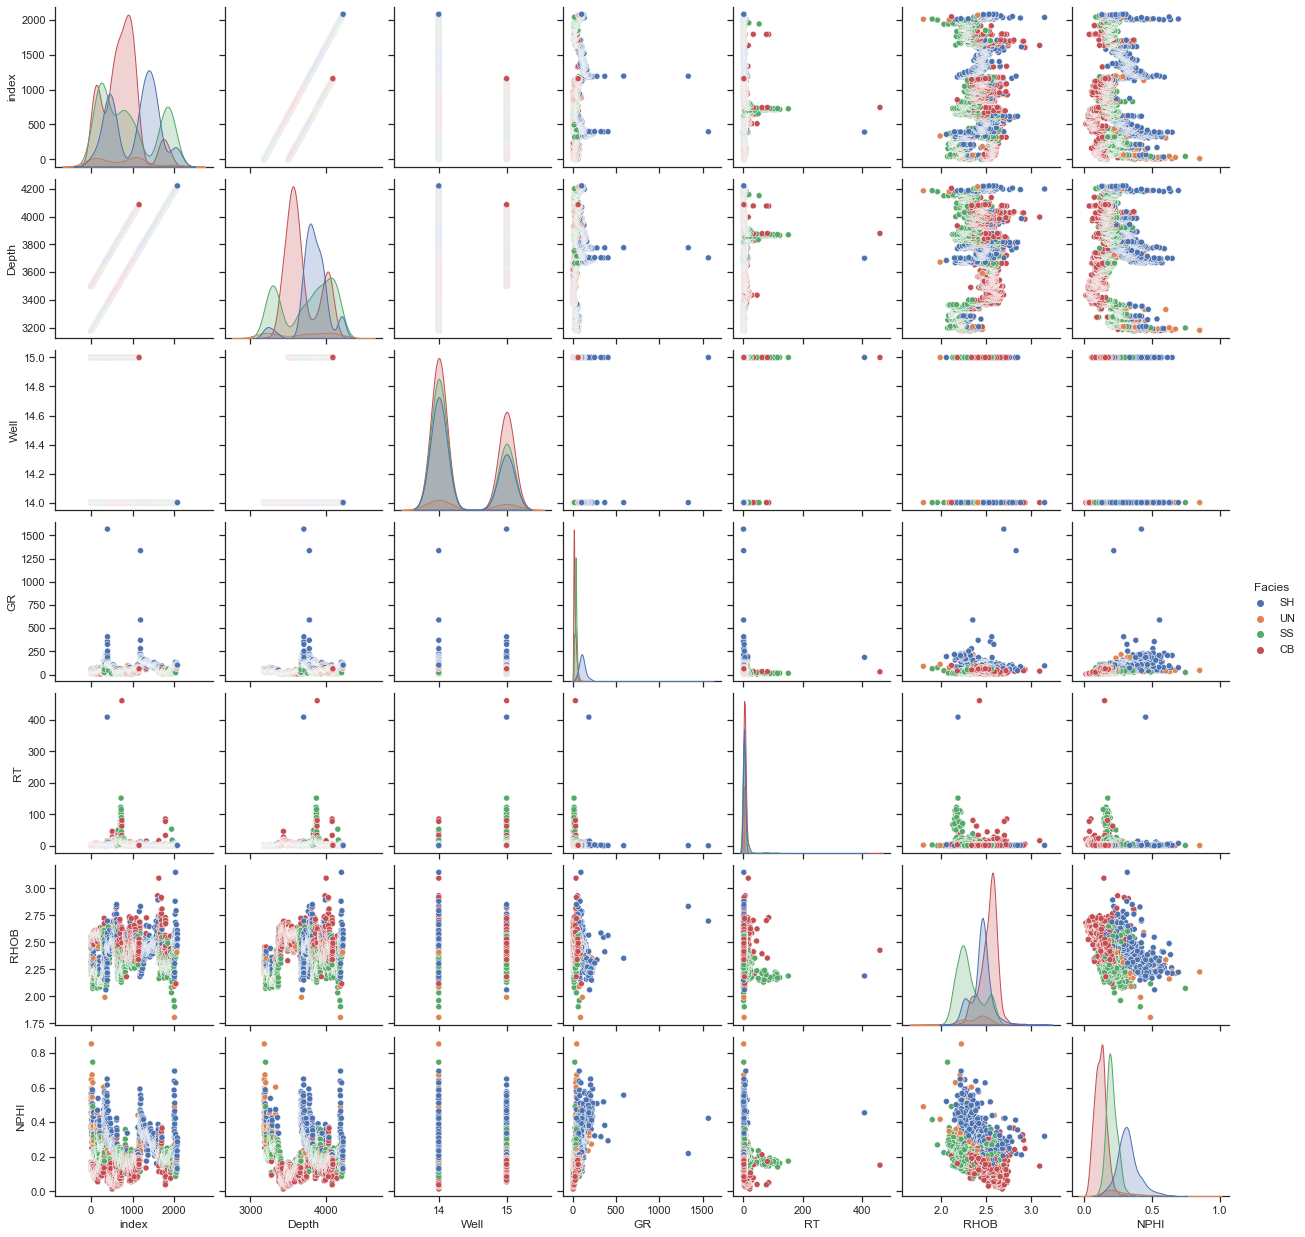

In [16]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue='Facies')

### Outlier Detection

Before identifying outliers we will first try to see the difference in the outlier points before and after scaling. 

In [17]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
np_scaled = scaler.fit_transform(data[['GR','RT','RHOB','NPHI']])
np_scaled
data_scaled = data[['GR','RT','RHOB','NPHI']]
data_scaled[['GR','RT','RHOB','NPHI']] = np_scaled

In [18]:
data_scaled

,GR,RT,RHOB,NPHI
0,-0.020123,-0.255037,-0.698239,1.518284
1,-0.071641,-0.242091,-0.783581,1.632460
2,-0.032157,-0.221854,-0.925820,3.181028
3,-0.112104,-0.196011,-1.227906,3.269298
4,-0.075836,-0.229876,-1.079572,2.879758
...,...,...,...,...
3236,0.144319,-0.174458,0.355001,-0.631866
3237,0.121977,-0.181895,0.361097,-0.631866
3238,0.106065,-0.185613,0.666571,-0.525366
3239,0.093689,-0.193532,0.273722,-0.277825


In [19]:
from sklearn.ensemble import IsolationForest
model =  IsolationForest(contamination = 0.05)
model.fit(data_scaled)
data_scaled['Anamoly'] = pd.Series(model.predict(data_scaled))
data_scaled['Anamoly'] = data_scaled['Anamoly'].map( {1: 0, -1: 1})

In [20]:
data_wk = data[['GR','RT','RHOB','NPHI']]
model2 =  IsolationForest(contamination = 0.05,warm_start=True)
model2.fit(data_wk)
data_wk['Anamoly'] = pd.Series(model2.predict(data_wk))
data_wk['Anamoly'] = data_wk['Anamoly'].map( {1: 0, -1: 1})


In [21]:
data_wk['Facies'] = data['Facies']

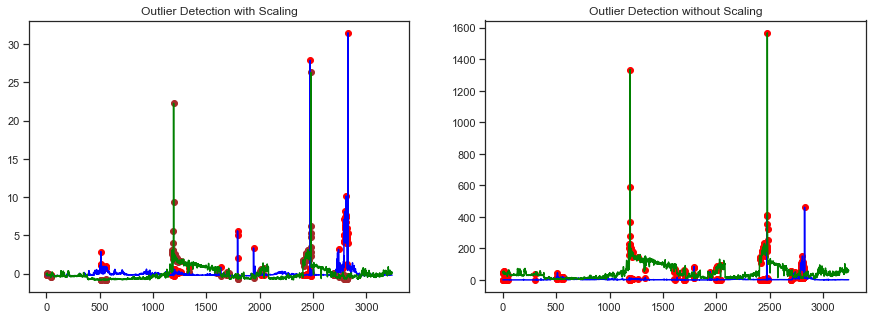

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# plot 1
a = data_scaled.loc[data_scaled['Anamoly'] == 1, ['RT','GR']] 
ax1.plot(data_scaled.index, data_scaled['RT'], color='blue')
ax1.plot(data_scaled.index, data_scaled['GR'], color='green') 
ax1.scatter(a.index,a['RT'], color='red')
ax1.scatter(a.index,a['GR'], color='brown')
ax1.set_title('Outlier Detection with Scaling')

b = data_wk.loc[data_wk['Anamoly'] == 1, ['RT','GR']] 
ax2.plot(data_wk.index, data_wk['RT'], color='blue') 
ax2.plot(data_wk.index, data_wk['GR'], color='green')
ax2.scatter(b.index,b['RT'], color='red') 
ax2.scatter(b.index,b['GR'], color='red') 
ax2.set_title('Outlier Detection without Scaling')

plt.show()

From the above two graphs we see that with or without scaling, almost the same points are identified as outliers. So to preserve the essence of data for Feature Engineering in the next steps, we do not use scaled data but proceed to use the un-scaled data for further processing.

In [23]:
data_wk = data_wk[data_wk['Anamoly']==0] #Deleted the rows which were outliers

In [24]:
data_wk.drop('Anamoly',axis=1,inplace=True) #Deleted the Anamoly column as we no longer need it

### Feature Engineering

Data Exploration showed that GR and RT might be log normally distributed. So trying to see and add those features for model building

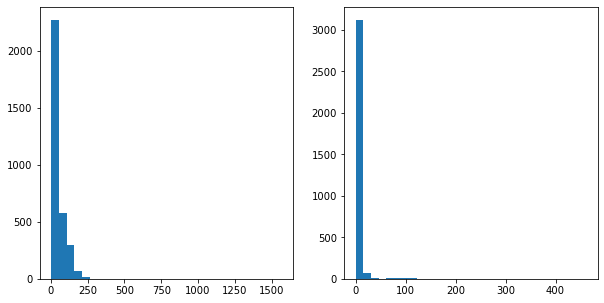

In [26]:
fig,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].hist(data_wk['GR'],bins=30)
axs[1].hist(data_wk['RT'],bins=30)
plt.show()

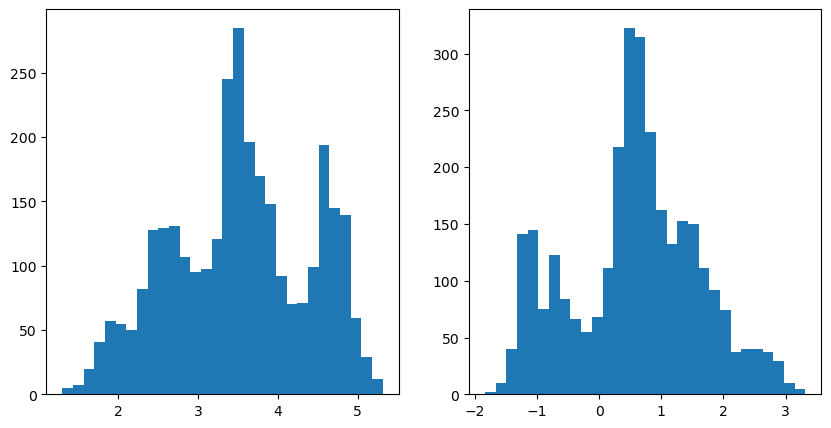

In [98]:
fig,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].hist(np.log(data_wk['GR']),bins=30)
axs[1].hist(np.log(data_wk['RT']),bins=30)
plt.show()

Above graph shows that the Log values of GR and RT are more Normally distributed, and hence we will take these values into account for our model as features. 

Based on priliminary understanding about Petroleum and Rock Classifications, added a few other features which are interaction terms of features with RHOB.

In [25]:
data_wk['ln(GR)'] = np.log(data_wk['GR'])
data_wk['ln(RT)'] = np.log(data_wk['RT'])
data_wk['Photoelectric Factor'] = data_wk['GR'] * data_wk['RHOB']
data_wk['Water Content']= data_wk['NPHI']/data_wk['RHOB']
data_wk['Acoustic Impedence'] = data_wk['RT'] - data_wk['RHOB']

data_wk

,GR,RT,RHOB,NPHI,Facies,ln(GR),ln(RT),Photoelectric Factor,Water Content,Acoustic Impedence
0,50.2190,0.5888,2.3296,0.3657,SH,3.916393,-0.529669,116.990182,0.156980,-1.7408
1,47.2468,0.7768,2.3170,0.3776,UN,3.855385,-0.252572,109.470836,0.162969,-1.5402
4,47.0048,0.9542,2.2733,0.5076,UN,3.850250,-0.046882,106.856012,0.223288,-1.3191
5,49.0612,0.5514,2.2463,0.4549,SH,3.893068,-0.595295,110.206174,0.202511,-1.6949
12,43.2248,0.7940,2.2670,0.4138,UN,3.766414,-0.230672,97.990622,0.182532,-1.4730
...,...,...,...,...,...,...,...,...,...,...
3236,59.7060,1.7590,2.4851,0.1416,CB,4.089433,0.564745,148.375381,0.056980,-0.7261
3237,58.4170,1.6510,2.4860,0.1416,CB,4.067607,0.501381,145.224662,0.056959,-0.8350
3238,57.4990,1.5970,2.5311,0.1527,CB,4.051768,0.468127,145.535719,0.060330,-0.9341
3239,56.7850,1.4820,2.4731,0.1785,CB,4.039272,0.393393,140.434983,0.072177,-0.9911


In [26]:
target = data_wk.pop('Facies')

In [27]:
data_wk['Facies'] = target

In [28]:
#print(data_wk['Facies'].value_counts())
#print(data['Facies'].value_counts())
data_wk['Facies'] = data_wk['Facies'].replace({'CB':0, 'SS':1, 'SH':2, 'UN':3}) 

In [29]:
data_wk = data_wk.reset_index()

In [30]:
data_wk

,index,GR,RT,RHOB,NPHI,ln(GR),ln(RT),Photoelectric Factor,Water Content,Acoustic Impedence,Facies
0,0,50.2190,0.5888,2.3296,0.3657,3.916393,-0.529669,116.990182,0.156980,-1.7408,2
1,1,47.2468,0.7768,2.3170,0.3776,3.855385,-0.252572,109.470836,0.162969,-1.5402,3
2,4,47.0048,0.9542,2.2733,0.5076,3.850250,-0.046882,106.856012,0.223288,-1.3191,3
3,5,49.0612,0.5514,2.2463,0.4549,3.893068,-0.595295,110.206174,0.202511,-1.6949,2
4,12,43.2248,0.7940,2.2670,0.4138,3.766414,-0.230672,97.990622,0.182532,-1.4730,3
...,...,...,...,...,...,...,...,...,...,...,...
3074,3236,59.7060,1.7590,2.4851,0.1416,4.089433,0.564745,148.375381,0.056980,-0.7261,0
3075,3237,58.4170,1.6510,2.4860,0.1416,4.067607,0.501381,145.224662,0.056959,-0.8350,0
3076,3238,57.4990,1.5970,2.5311,0.1527,4.051768,0.468127,145.535719,0.060330,-0.9341,0
3077,3239,56.7850,1.4820,2.4731,0.1785,4.039272,0.393393,140.434983,0.072177,-0.9911,0


In [31]:
data_wk.drop("index",axis=1,inplace=True)

In [56]:
data_wk

,GR,RT,RHOB,NPHI,ln(GR),ln(RT),Photoelectric Factor,Water Content,Acoustic Impedence,Facies
0,50.2190,0.5888,2.3296,0.3657,3.916393,-0.529669,116.990182,0.156980,-1.7408,2
1,47.2468,0.7768,2.3170,0.3776,3.855385,-0.252572,109.470836,0.162969,-1.5402,3
2,47.0048,0.9542,2.2733,0.5076,3.850250,-0.046882,106.856012,0.223288,-1.3191,3
3,49.0612,0.5514,2.2463,0.4549,3.893068,-0.595295,110.206174,0.202511,-1.6949,2
4,43.2248,0.7940,2.2670,0.4138,3.766414,-0.230672,97.990622,0.182532,-1.4730,3
...,...,...,...,...,...,...,...,...,...,...
3074,59.7060,1.7590,2.4851,0.1416,4.089433,0.564745,148.375381,0.056980,-0.7261,0
3075,58.4170,1.6510,2.4860,0.1416,4.067607,0.501381,145.224662,0.056959,-0.8350,0
3076,57.4990,1.5970,2.5311,0.1527,4.051768,0.468127,145.535719,0.060330,-0.9341,0
3077,56.7850,1.4820,2.4731,0.1785,4.039272,0.393393,140.434983,0.072177,-0.9911,0


### Train Test Split

In [32]:
X = data_wk.iloc[:,0:9]
y = data_wk.iloc[:,9] 

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

## Model Building

####  1. Random Forest

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pipe_rf = Pipeline([('scaler',RobustScaler()),('model',RandomForestClassifier())])

param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split':[2,3,4]
}

grid_rf=GridSearchCV(pipe_rf,param_grid=param_grid,cv=5)
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [None, 5, 10],
                         'model__min_samples_split': [2, 3, 4],
                         'model__n_estimators': [100, 200, 500]})

In [111]:
y_pred = grid_rf.best_estimator_.predict(X_test)

print(f'Generalisation :{grid_rf.best_estimator_.score(X_test,y_test)}; Memorization: {grid_rf.best_score_}')


Generalisation :0.8766233766233766; Memorization: 0.8794150629133066


In [112]:
x = RandomForestClassifier()
param_grid2 = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split':[2,3,4]
}

grid_rf2=GridSearchCV(x,param_grid=param_grid2,cv=5)
grid_rf2.fit(X_train,y_train)

#grid_rf2.score(X_train, y_train)
#grid_rf2.score(X_test, y_test)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 500]})

#### 2. Support Vector Classfier

In [113]:
from sklearn.svm import SVC

pipe_svc = Pipeline([('scaler',RobustScaler()),('model_svc',SVC())])
param_grid2 = {
    'model_svc__C': [0.1,1,10],
    'model_svc__kernel': ['linear', 'poly'],
    'model_svc__degree': [3, 4],
    'model_svc__gamma': ['auto']
}
grid_svc=GridSearchCV(pipe_svc,param_grid=param_grid2,cv=5,verbose = 3)
grid_svc.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END model_svc__C=0.1, model_svc__degree=3, model_svc__gamma=auto, model_svc__kernel=linear;, score=0.860 total time=   0.0s
[CV 2/5] END model_svc__C=0.1, model_svc__degree=3, model_svc__gamma=auto, model_svc__kernel=linear;, score=0.826 total time=   0.0s
[CV 3/5] END model_svc__C=0.1, model_svc__degree=3, model_svc__gamma=auto, model_svc__kernel=linear;, score=0.858 total time=   0.0s
[CV 4/5] END model_svc__C=0.1, model_svc__degree=3, model_svc__gamma=auto, model_svc__kernel=linear;, score=0.843 total time=   0.0s
[CV 5/5] END model_svc__C=0.1, model_svc__degree=3, model_svc__gamma=auto, model_svc__kernel=linear;, score=0.858 total time=   0.0s
[CV 1/5] END model_svc__C=0.1, model_svc__degree=3, model_svc__gamma=auto, model_svc__kernel=poly;, score=0.765 total time=   0.0s
[CV 2/5] END model_svc__C=0.1, model_svc__degree=3, model_svc__gamma=auto, model_svc__kernel=poly;, score=0.759 total time=   0.0s
[CV 3/5] END

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model_svc', SVC())]),
             param_grid={'model_svc__C': [0.1, 1, 10],
                         'model_svc__degree': [3, 4],
                         'model_svc__gamma': ['auto'],
                         'model_svc__kernel': ['linear', 'poly']},
             verbose=3)

In [114]:
grid_svc.score(X_train,y_train)
grid_svc.score(X_test,y_test)
print(f'Generalisation :{grid_svc.best_estimator_.score(X_test,y_test)}; Memorization: {grid_svc.best_score_}')

Generalisation :0.8538961038961039; Memorization: 0.8534326093768037


In [115]:
y_pred_svc=grid_svc.best_estimator_.predict(X_test)

#### 3. Logistic Regreesion

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pipe_lr = Pipeline([('scaler',RobustScaler()),('pca',PCA()),('model_lr',LogisticRegression())]) 
param_grid3 = {
    'pca__n_components': [2, 3, 4, 5],
    'model_lr__penalty': ['l1','l2'],
    'model_lr__C': [0.1, 1.0, 1.5, 10.0]
}

grid_lr=GridSearchCV(pipe_lr,param_grid=param_grid3,cv=5)
grid_lr.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('pca', PCA()),
                                       ('model_lr', LogisticRegression())]),
             param_grid={'model_lr__C': [0.1, 1.0, 1.5, 10.0],
                         'model_lr__penalty': ['l1', 'l2'],
                         'pca__n_components': [2, 3, 4, 5]})

In [117]:
print(f'Generalisation :{grid_lr.score(X_test,y_test)}; Memorization: {grid_lr.score(X_train,y_train)}')

Generalisation :0.8441558441558441; Memorization: 0.8534307754770605


In [118]:
y_pred_lr=grid_lr.best_estimator_.predict(X_test)

#### 4. KNN Classification

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
pipe_knn_scaled = Pipeline([('scaler',RobustScaler()),('model_knn',KNeighborsClassifier())]) 
param_grid4 = {
    'model_knn__n_neighbors': [3, 5, 7, 9],
    'model_knn__weights': ['uniform', 'distance'],
    'model_knn__p': [1, 2]
}

grid_knn_scaled=GridSearchCV(pipe_knn_scaled,param_grid=param_grid4,cv=5)
grid_knn_scaled.fit(X_train,y_train)
#grid_knn_scaled.score(X_test,y_test)
print(f'Generalisation :{grid_knn_scaled.score(X_test,y_test)}; Memorization: {grid_knn_scaled.score(X_train,y_train)}')

Generalisation :0.8685064935064936; Memorization: 0.8940316686967114


In [42]:
y_pred_knn=grid_knn_scaled.best_estimator_.predict(X_test)

In [41]:
pipe_knn_unscaled = Pipeline([('model_knn',KNeighborsClassifier())]) 
grid_knn_unscaled=GridSearchCV(pipe_knn_unscaled,param_grid=param_grid4,cv=5)
grid_knn_unscaled.fit(X_train,y_train)
#grid_knn_unscaled.score(X_test,y_test)
print(f'Generalisation :{grid_knn_unscaled.score(X_test,y_test)}; Memorization: {grid_knn_unscaled.score(X_train,y_train)}')

Generalisation :0.8084415584415584; Memorization: 0.8412505075111653


#### Classification Report

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

df2=pd.DataFrame()
df2['y_test']=y_test
df2['y_pred']=y_pred_knn
df2
print(confusion_matrix(df2['y_test'],df2['y_pred']))
print(classification_report(df2['y_test'] ,df2['y_pred']))

[[213  28   2   1]
 [ 24 167   1   1]
 [  0   2 149   6]
 [  4   4   8   6]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       244
           1       0.83      0.87      0.85       193
           2       0.93      0.95      0.94       157
           3       0.43      0.27      0.33        22

    accuracy                           0.87       616
   macro avg       0.77      0.74      0.75       616
weighted avg       0.86      0.87      0.87       616



In [53]:
df1=pd.DataFrame()
df1['y_test']=y_test
df1['y_pred']=y_pred

In [123]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

df1['y_test'] = df1['y_test'].replace({0:'CB',1: 'SS', 2:'SH', 3:'UN'}) 
df1['y_pred'] = df1['y_pred'].replace({0:'CB',1: 'SS', 2:'SH', 3:'UN'})


print(confusion_matrix(df1['y_test'],df1['y_pred'],labels=['CB','SS','SH','UN']))
print(classification_report(df1['y_test'] ,df1['y_pred'],labels=['CB','SS','SH','UN']))

[[213  28   2   1]
 [ 22 164   4   1]
 [  0   1 157   1]
 [  1   8   7   6]]
              precision    recall  f1-score   support

          CB       0.90      0.87      0.89       244
          SS       0.82      0.86      0.84       191
          SH       0.92      0.99      0.95       159
          UN       0.67      0.27      0.39        22

    accuracy                           0.88       616
   macro avg       0.83      0.75      0.77       616
weighted avg       0.87      0.88      0.87       616



### Classification Model Visualizations

In [132]:
Data_df=pd.DataFrame()
Data_df['TestSample']=y_test
Data_df['RandomForest']=y_pred
Data_df['SVC']=y_pred_svc
Data_df['KNN']=y_pred_knn
Data_df['LR']=y_pred_lr

#### (1) Heatmap

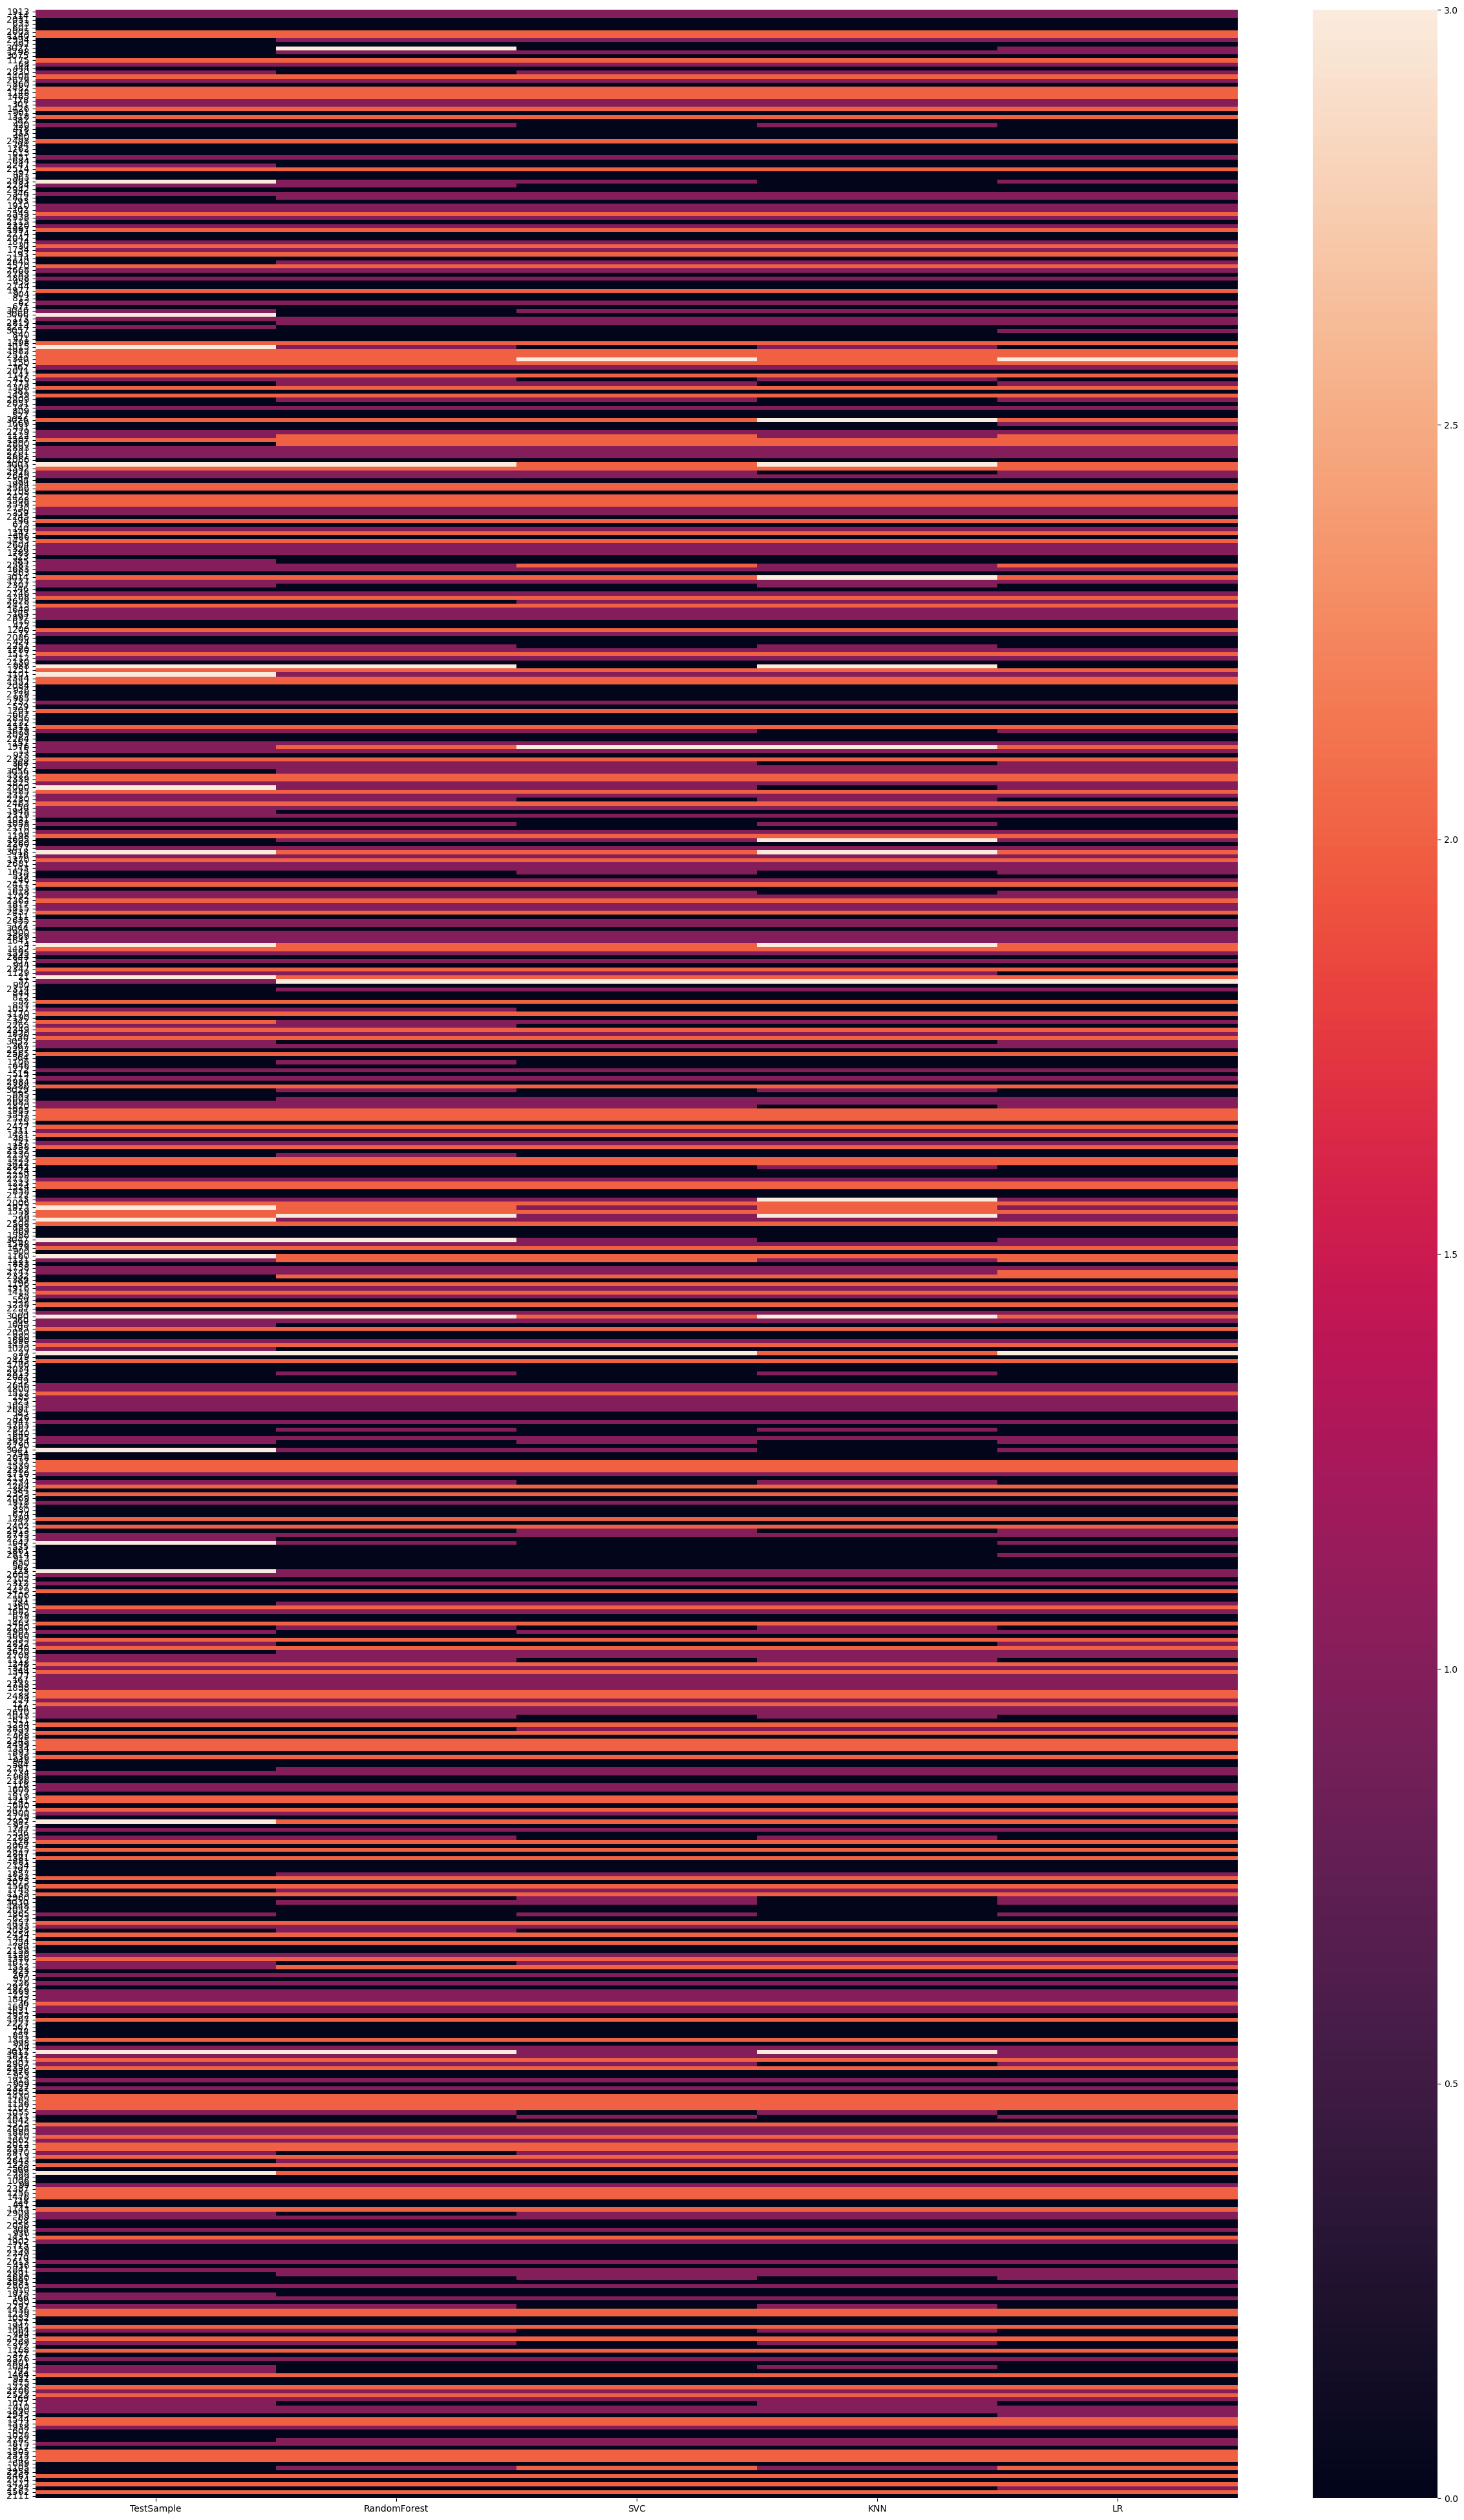

In [138]:
plt.figure(figsize=(30, 50))
sns.heatmap(data=Data_df,xticklabels=Data_df.columns,yticklabels=Data_df.index)
plt.show()

#### (2) ROC curves

In [155]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [156]:
label_encoder=LabelEncoder()
label_encoder.fit_transform(y_train)
label_encoder.transform(y_test)
classes=label_encoder.classes_

In [159]:
mn=MinMaxScaler()
X_train_norm=mn.fit_transform(X_train)
X_test_norm=mn.fit_transform(X_test)

In [160]:
RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_norm,y_train)
y_pred=RF.predict(X_test_norm)
pred_prob=RF.predict_proba(X_test_norm)

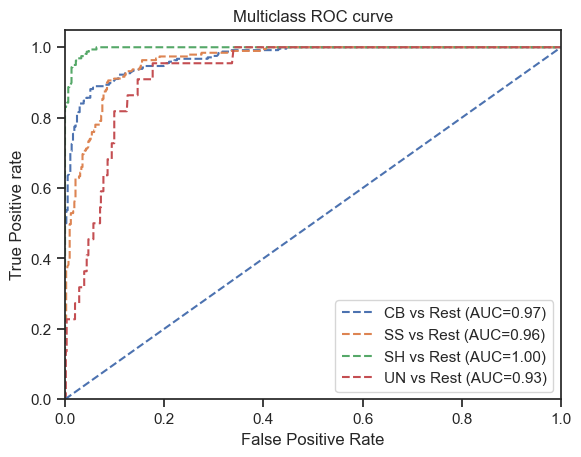

In [166]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
labels=['CB','SS','SH','UN']
n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

#### (3) Pie-Chart Actual v/s Predicted

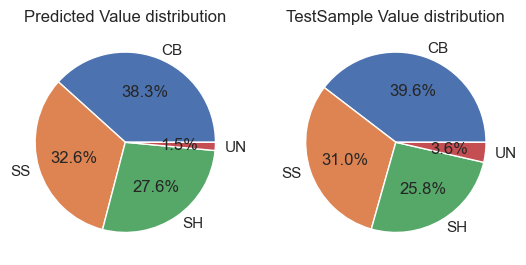

In [181]:
p=Data_df['RandomForest'].value_counts()
t=Data_df['TestSample'].value_counts()
p=list(p)
t=list(t)
labels

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(p,labels=labels, autopct='%1.1f%%')
ax1.set_title('Predicted Value distribution')
ax2.pie(t,labels=labels, autopct='%1.1f%%')
ax2.set_title('TestSample Value distribution')
plt.show()

## Deployment 

In [189]:
data_13=pd.read_excel("VolveData_Project.xlsx",sheet_name = "well 13")
data_13

,Depth,Well,GR,RT,RHOB,NPHI
0,4175.5,13,20.6032,4.1812,2.6117,0.0770
1,4176.0,13,21.4990,4.5516,2.6131,0.0798
2,4176.5,13,22.4472,4.4804,2.6334,0.0801
3,4177.0,13,29.6713,4.3859,2.6328,0.1005
4,4177.5,13,34.7014,4.8566,2.6183,0.1001
...,...,...,...,...,...,...
822,4586.5,13,68.1668,1.3877,2.5219,0.1587
823,4587.0,13,71.9559,1.3800,2.5062,0.1739
824,4587.5,13,67.5752,1.3391,2.5030,0.1704
825,4588.0,13,65.0492,1.3286,2.4855,0.1754


In [190]:
data_13['ln(GR)'] = np.log(data_13['GR'])
data_13['ln(RT)'] = np.log(data_13['RT'])
data_13['Photoelectric Factor'] = data_13['GR'] * data_13['RHOB']
data_13['Water Content']= data_13['NPHI']/data_13['RHOB']
data_13['Acoustic Impedence'] = data_13['RT'] - data_13['RHOB']

data_13

,Depth,Well,GR,RT,RHOB,NPHI,ln(GR),ln(RT),Photoelectric Factor,Water Content,Acoustic Impedence
0,4175.5,13,20.6032,4.1812,2.6117,0.0770,3.025446,1.430598,53.809377,0.029483,1.5695
1,4176.0,13,21.4990,4.5516,2.6131,0.0798,3.068006,1.515479,56.179037,0.030538,1.9385
2,4176.5,13,22.4472,4.4804,2.6334,0.0801,3.111166,1.499712,59.112456,0.030417,1.8470
3,4177.0,13,29.6713,4.3859,2.6328,0.1005,3.390180,1.478395,78.118599,0.038172,1.7531
4,4177.5,13,34.7014,4.8566,2.6183,0.1001,3.546780,1.580339,90.858676,0.038231,2.2383
...,...,...,...,...,...,...,...,...,...,...,...
822,4586.5,13,68.1668,1.3877,2.5219,0.1587,4.221958,0.327648,171.909853,0.062929,-1.1342
823,4587.0,13,71.9559,1.3800,2.5062,0.1739,4.276053,0.322083,180.335877,0.069388,-1.1262
824,4587.5,13,67.5752,1.3391,2.5030,0.1704,4.213241,0.291998,169.140726,0.068078,-1.1639
825,4588.0,13,65.0492,1.3286,2.4855,0.1754,4.175144,0.284126,161.679787,0.070569,-1.1569


In [191]:
y_predicted_13=grid_rf.best_estimator_.predict(data_13.iloc[:,2:])

In [192]:
df=pd.DataFrame()
df['depth']=data_13['Depth']
df['ln(GR)']=data_13['ln(GR)']
df['Predicted']=y_predicted_13
df

,depth,ln(GR),Predicted
0,4175.5,3.025446,0
1,4176.0,3.068006,0
2,4176.5,3.111166,0
3,4177.0,3.390180,0
4,4177.5,3.546780,0
...,...,...,...
822,4586.5,4.221958,0
823,4587.0,4.276053,2
824,4587.5,4.213241,2
825,4588.0,4.175144,2


Text(0.5, 1.0, 'Predicted Value distribution')

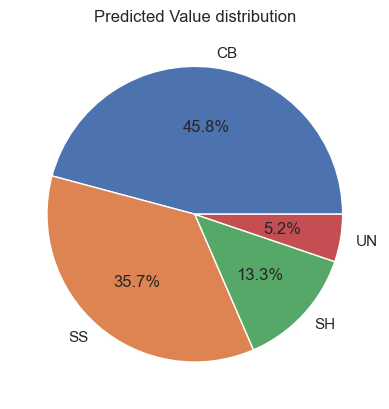

In [194]:
d=df['Predicted'].value_counts()
d=list(d)
plt.pie(d,labels=labels, autopct='%1.1f%%')
plt.title('Predicted Value distribution')

In [195]:
df['Predicted'] = df['Predicted'].replace({0:'CB',1: 'SS', 2:'SH', 3:'UN'}) 

In [196]:
df

,depth,ln(GR),Predicted
0,4175.5,3.025446,CB
1,4176.0,3.068006,CB
2,4176.5,3.111166,CB
3,4177.0,3.390180,CB
4,4177.5,3.546780,CB
...,...,...,...
822,4586.5,4.221958,CB
823,4587.0,4.276053,SH
824,4587.5,4.213241,SH
825,4588.0,4.175144,SH


In [197]:
#we need to change the address according to where we need to save the excel file 

In [198]:
df.to_excel("Deployment_File.xlsx")